In [1]:
#pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import seaborn as sns

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.1 MB/s 

ELIMINAR VALORES NULOS

In [7]:
df=pd.read_csv("diamonds.csv")
df.isnull().sum()

,0
carat,3
cut,0
color,0
clarity,0
depth,2
table,3
price,3
x,1
y,1
z,4


In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [11]:
#Eliminar valores nulos
df["carat"]=df["carat"].fillna(round(df ['carat'].mean(),1))
df["depth"]=df["depth"].fillna(round(df ['depth'].mean(),1))
df["table"]=df["table"].fillna(round(df ['table'].mean(),1))
df["price"]=df["price"].fillna(round(df ['price'].mean(),1))
df["x"]=df["x"].fillna(round(df ['x'].mean(),1))
df["y"]=df["y"].fillna(round(df ['y'].mean(),1))
df["z"]=df["z"].fillna(round(df ['z'].mean(),1))
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


ELIMINAR OUTLIERS

In [12]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = df.select_dtypes(include = 'object')
columnas_cuantitativas = df.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

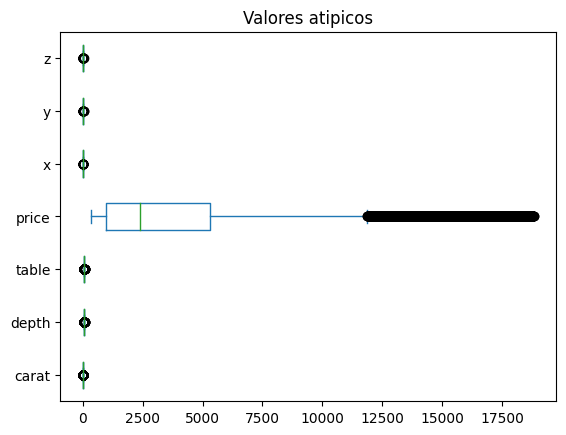

In [13]:
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [14]:
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido carat        2.219953
depth       66.047217
table       64.160560
price    15901.154414
x            9.096441
y            9.160929
z            5.655794
dtype: float64
Limite inferior permitido carat      -0.624090
depth      57.451571
table      50.753974
price   -8035.391985
x           2.365894
y           2.308121
z           1.421668
dtype: float64


In [15]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
carat,439
depth,685
table,336
price,1206
x,43
y,34
z,55


In [16]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))

#Se juntan las columnas cualitativas con las cuantitativas
df_limpio = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
df_limpio.head()

,carat,depth,table,price,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,326.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,326.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,61.7,57.4,327.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.4,58.0,334.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,335.0,4.34,4.35,2.75,Good,J,SI2


In [17]:
#Comprobamos que no existan valores nulos
df_limpio.isnull().sum()

,0
carat,0
depth,0
table,0
price,0
x,0
y,0
z,0
cut,0
color,0
clarity,0


CORRELACIÓN

In [18]:
Corr_Factors=columnas_cuantitativas_limpio.corr()
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,carat,depth,table,price,x,y,z
carat,1.000000,0.011303,0.185252,0.850727,0.957223,0.955947,0.955040
depth,0.011303,1.000000,0.277038,0.002363,0.031844,0.033726,0.074941
table,0.185252,0.277038,1.000000,0.128089,0.195969,0.190798,0.159849
price,0.850727,0.002363,0.128089,1.000000,0.842960,0.844283,0.840151
x,0.957223,0.031844,0.195969,0.842960,1.000000,0.997742,0.989112
y,0.955947,0.033726,0.190798,0.844283,0.997742,1.000000,0.988657
z,0.955040,0.074941,0.159849,0.840151,0.989112,0.988657,1.000000


0.8507269349098782

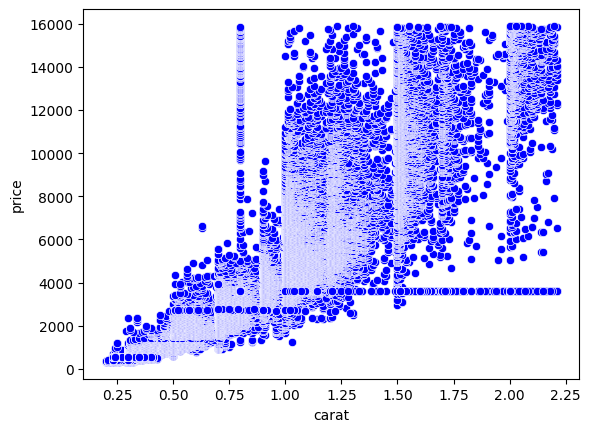

In [26]:
###A)
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= columnas_cuantitativas_limpio[['carat']]
Var_Dep= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='carat', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.0023629420848457483

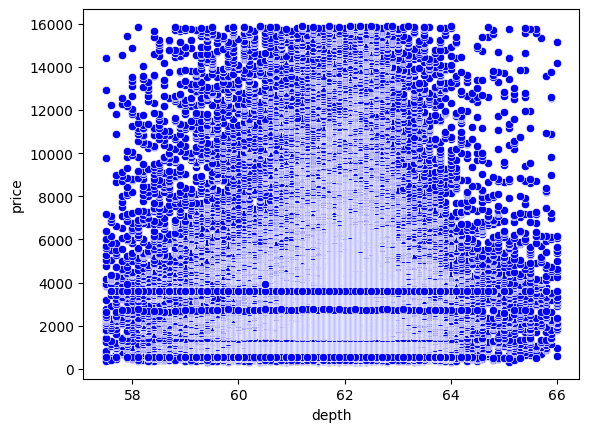

In [28]:
###B)
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepB= columnas_cuantitativas_limpio[['depth']]
Var_DepB= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelB= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelB.fit(X=Vars_IndepB, y=Var_DepB)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelB.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='depth', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_DeterB=modelB.score(X=Vars_IndepB, y=Var_DepB)
coef_CorrelB=np.sqrt(coef_DeterB)
coef_CorrelB

0.12808948802804754

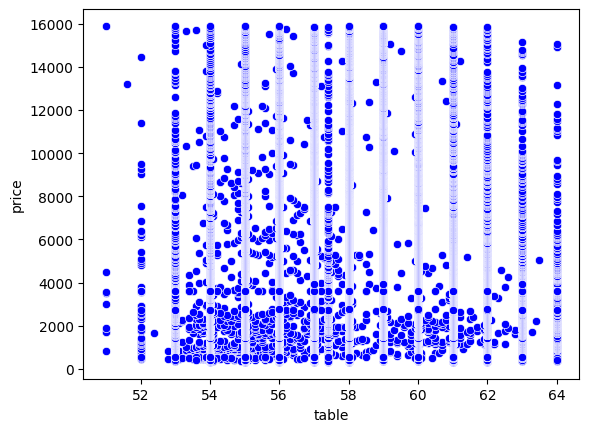

In [30]:
###C)
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepC= columnas_cuantitativas_limpio[['table']]
Var_DepC= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelC= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelC.fit(X=Vars_IndepC, y=Var_DepC)

#Verificamos los coeficientes obtenidos para el modelo ajustado
modelC.__dict__

#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
sns.scatterplot(x='table', y='price', color="blue", data=columnas_cuantitativas_limpio)
coef_DeterC=modelC.score(X=Vars_IndepC, y=Var_DepC)
coef_CorrelC=np.sqrt(coef_DeterC)
coef_CorrelC

In [33]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepMD= columnas_cuantitativas_limpio[["carat","depth"]]
Var_DepMD= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMD= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMD.fit(X=Vars_IndepMD, y=Var_DepMD)

modelMD.__dict__

coef_DeterMD=modelMD.score(X=Vars_IndepMD, y=Var_DepMD)
coef_CorrelMD=np.sqrt(coef_DeterMD)
coef_CorrelMD

0.8508112763606015

In [34]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepME= columnas_cuantitativas_limpio[["carat","table"]]
Var_DepME= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelME= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelME.fit(X=Vars_IndepME, y=Var_DepME)

modelME.__dict__

coef_DeterME=modelME.score(X=Vars_IndepME, y=Var_DepME)
coef_CorrelME=np.sqrt(coef_DeterME)
coef_CorrelME

0.8512567539729646

In [35]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepMF= columnas_cuantitativas_limpio[["depth","table"]]
Var_DepMF= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMF= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMF.fit(X=Vars_IndepMF, y=Var_DepMF)

modelMF.__dict__

coef_DeterMF=modelMF.score(X=Vars_IndepMF, y=Var_DepMF)
coef_CorrelMF=np.sqrt(coef_DeterMF)
coef_CorrelMF

0.13264702940731454

In [36]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepMG= columnas_cuantitativas_limpio[["x","y","z"]]
Var_DepMG= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMG= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMG.fit(X=Vars_IndepMG, y=Var_DepMG)

modelMG.__dict__

coef_DeterMG=modelMG.score(X=Vars_IndepMG, y=Var_DepMG)
coef_CorrelMG=np.sqrt(coef_DeterMG)
coef_CorrelMG

0.8450614877848786

In [37]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepMH= columnas_cuantitativas_limpio[["x","y","z", "carat", "depth"]]
Var_DepMH= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMH= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMH.fit(X=Vars_IndepMH, y=Var_DepMH)

modelMH.__dict__

coef_DeterMH=modelMH.score(X=Vars_IndepMH, y=Var_DepMH)
coef_CorrelMH=np.sqrt(coef_DeterMH)
coef_CorrelMH

0.8574805051561216

In [38]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_IndepMi= columnas_cuantitativas_limpio[["x","y","z", "carat", "depth", "table"]]
Var_DepMi= columnas_cuantitativas_limpio['price']

#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
modelMi= LinearRegression()

#Ajustamos el modelo con las variables antes declaradas
modelMi.fit(X=Vars_IndepMi, y=Var_DepMi)

modelMi.__dict__

coef_DeterMi=modelMi.score(X=Vars_IndepMi, y=Var_DepMi)
coef_CorrelMi=np.sqrt(coef_DeterMi)
coef_CorrelMi

0.8581444506102681